# Preparing environment

**Step 1.** Installing Pytesseract and tesseract-OCR

In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (11.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [2]:
!sudo apt install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 3,743 kB of archives.
After this operation, 16.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.3 [581 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Fetched 3,743 kB in 0s (12.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dial

In [3]:
!pip install pytesseract

In [4]:
!pip show pytesseract

Name: pytesseract
Version: 0.3.13
Summary: Python-tesseract is a python wrapper for Google's Tesseract-OCR
Home-page: https://github.com/madmaze/pytesseract
Author: Samuel Hoffstaetter
Author-email: samuel@hoffstaetter.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: packaging, Pillow
Required-by: 


In [5]:
!tesseract -v

tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


Zainstalowanie wersji językowej

In [6]:
!apt-get install tesseract-ocr-pol

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-pol
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,610 kB of archives.
After this operation, 4,780 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-pol all 1:4.00~git30-7274cfa-1.1 [1,610 kB]
Fetched 1,610 kB in 0s (5,623 kB/s)
Selecting previously unselected package tesseract-ocr-pol.
(Reading database ... 123813 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-pol_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-pol (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-pol (1:4.00~git30-7274cfa-1.1) ...


In [7]:
!ls -ltr /usr/share/tesseract-ocr/4.00/tessdata/pol.traineddata

-rw-r--r-- 1 root root 4765518 Sep 15  2017 /usr/share/tesseract-ocr/4.00/tessdata/pol.traineddata


#Importing libraries

**Step 2.** Importing necessary libraries and creating useful functions

In [23]:
import tensorflow
import keras
import os
import glob
from skimage import io #, threshold_otsu
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color, filters
%matplotlib inline
import random
import pytesseract
import shutil
import os
# try:
#   from PIL import Image
# except ImportError:
#   import Image

In [9]:
def show_image(image, title='Image', cmap_type='gray'):
    #plt.imshow(image)
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

# Image preparation

**Step 3.** Uploading picture.

In [10]:
from google.colab import files
uploaded = files.upload()

Saving 2.png to 2.png


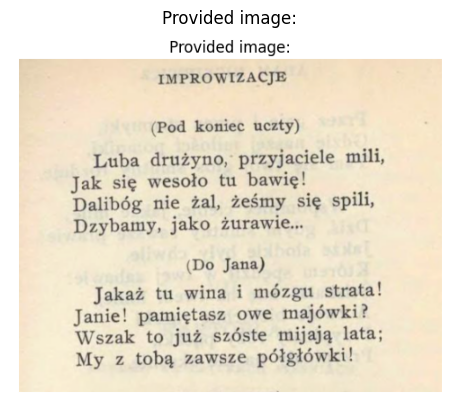

In [11]:
image_filename = '2.png'

# Loading the image
image = mpimg.imread(image_filename)

show_image(image, 'Provided image:')

# Remove the alpha channel if present
if image.shape[2] == 4:
    image = image[:, :, :3]

**Step 4.** Image analysis.

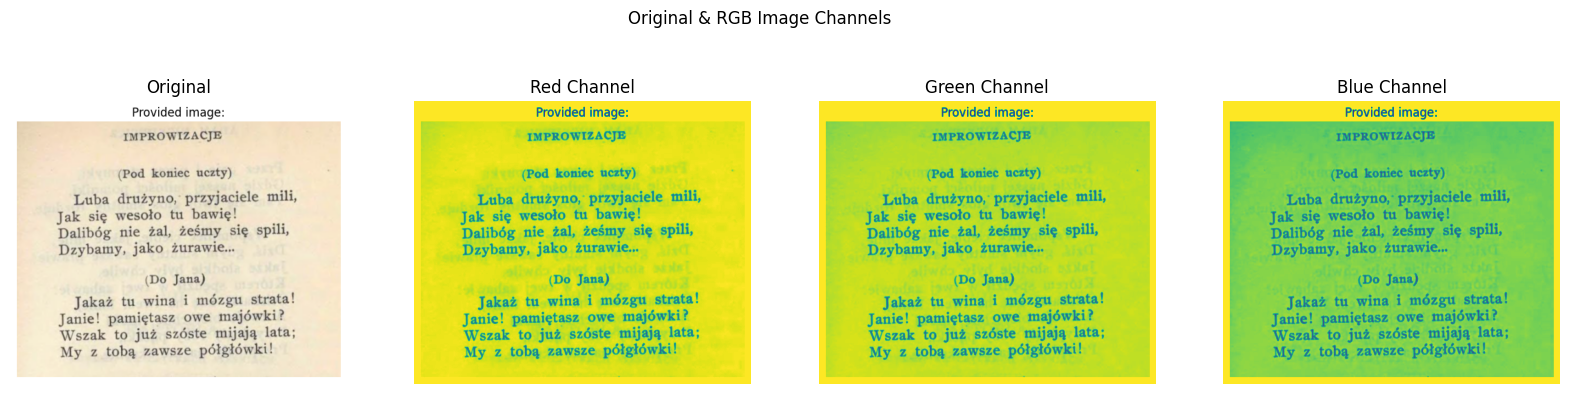

In [12]:
# Create subplots for the image and its RGB channels
fig, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
fig.set_figwidth(20)

# Display the original image and its RGB channels
im1.imshow(image)
im2.imshow(image[:, :, 0])  # Red channel
im3.imshow(image[:, :, 1])  # Green channel
im4.imshow(image[:, :, 2])  # Blue channel

# Set titles
im1.set_title('Original')
im2.set_title('Red Channel')
im3.set_title('Green Channel')
im4.set_title('Blue Channel')

# Remove axis labels from all subplots
for ax in [im1, im2, im3, im4]:
    ax.axis('off')

# Add a title for the entire figure
fig.suptitle('Original & RGB Image Channels')

# Show the plot
plt.show()

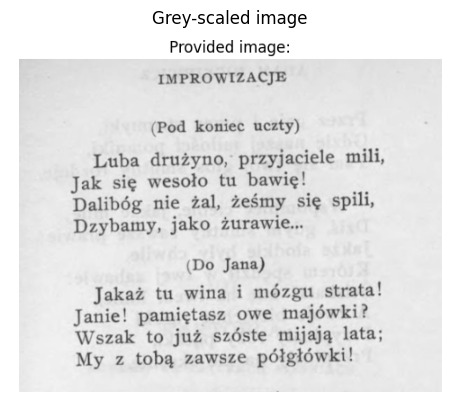

In [13]:
# Convert the image to grayscale
gray_image = color.rgb2gray(image)
show_image(gray_image, 'Grey-scaled image');

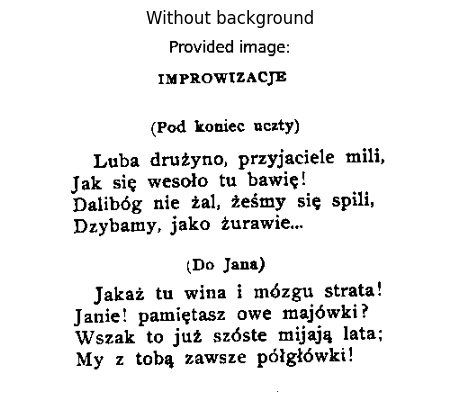

In [24]:
# Obtain the optimal Otsu global threshold value
global_thresh = filters.threshold_otsu(gray_image)

# Obtain the binary image by applying global thresholding
binary_image = gray_image > global_thresh

show_image(binary_image, 'Without background')

#plt.imshow(binary_image, cmap='gray')
# plt.axis('off')
# plt.show()

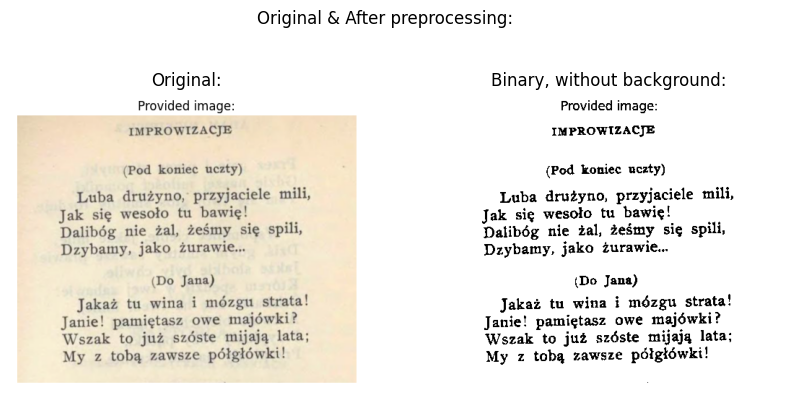

In [17]:
fig, (im1, im2) = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(10)


# Display the original image and its RGB channels
im1.imshow(image)
im2.imshow(binary_image, cmap='gray')

im1.set_title('Original:')
im2.set_title('Binary, without background:')

for ax in [im1, im2]:
    ax.axis('off')
fig.suptitle('Original & After preprocessing:')

plt.show()

**Krok 4.** Ekstrakcja tekstu

*Funkcja **image_to_string** weźmie obraz za argument i zwróci wyekstrahowany tekst z obrazu. Wynik można wyprintować albo przechować string w jakiejś zmiennej.*

In [18]:
extractedInformation = pytesseract.image_to_string(binary_image, lang='pol+eng')
print(extractedInformation)

Provided image:

IMPROWIZACJE

(Pod koniec uczty)

Luba drużyno, przyjaciele mili,
Jak się wesoło tu bawię!
Dalibóg nie żal, żeśmy się spili,
Dzybamy, jako żurawie...

(Do Jana)

Jakaż tu wina i mózgu strata!
Janie! pamiętasz owe majówki?
Wszak to już szóste mijają lata;
My z tobą zawsze półgłówki!

